In [21]:
import pandas as pd
import numpy as np
import os, glob
import subprocess
import numpy as np
import sys
import math
import matplotlib.pyplot as plt

from InputSetup import FFInputCreation as inputCreation
from ParameterManipulation import copyFFNominalFiles, createTSParamFiles, createFFParamFiles, copyNominalFiles
from stochasticTurbulenceTools_mod import stochasticTurbulence

In [22]:
nSeeds = 1
nBins=1
nCases = 1
nInflows=nCases

HubHt = 88.5
D=246.0

In [23]:
os.chdir('/projects/shellwind/kshaler/')

### Create cases based on ranges or discrete values?

In [24]:
Ranges = False

### Read in case parameters

In [25]:
if Ranges == False:
    ParamVals = pd.read_csv('NewParams_Shell.csv', header=None,index_col=0,delimiter=',')
    nTurbs = int(ParamVals.shape[0]/3)
    nCases = int(ParamVals.shape[1])
else:
    
    writeParamVals()
    OrigVals = pd.read_csv('./ParamRanges.csv', names=['Var','MinVar','MaxVar','NomVar'])
    OrigVals = OrigVals['NomVar']

In [26]:
caseNames=['None']*nCases
for case in range(nCases):
    if case < 10:
        case = '0'+str(case)
    caseNames[int(case)] = 'Inflow{0}'.format(case)
    
ParamVals.columns=caseNames

In [27]:
nTurbs=int(ParamVals.shape[0]/3)

In [28]:
ParamVals

,Inflow00,Inflow01,Inflow02,Inflow03,Inflow04,Inflow05,Inflow06,Inflow07,Inflow08,Inflow09,...,Inflow35,Inflow36,Inflow37,Inflow38,Inflow39,Inflow40,Inflow41,Inflow42,Inflow43,Inflow44
0,,,,,,,,,,,,,,,,,,,,,
TI,A,A,A,A,A,A,A,A,A,A,...,C,C,C,C,C,C,C,C,C,C
Vhub,6.6,6.6,6.6,8.6,8.6,8.6,10.6,10.6,10.6,12.6,...,8.6,10.6,10.6,10.6,12.6,12.6,12.6,16.6,16.6,16.6
Shear,0.1,0.2,0.3,0.1,0.2,0.3,0.1,0.2,0.3,0.1,...,0.3,0.1,0.2,0.3,0.1,0.2,0.3,0.1,0.2,0.3
T1x-locs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1y-locs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T2x-locs,8228.086,8228.086,8228.086,8228.086,8228.086,8228.086,8228.086,8228.086,8228.086,8228.086,...,8228.086,8228.086,8228.086,8228.086,8228.086,8228.086,8228.086,8228.086,8228.086,8228.086
T2y-locs,6014.307,6014.307,6014.307,6014.307,6014.307,6014.307,6014.307,6014.307,6014.307,6014.307,...,6014.307,6014.307,6014.307,6014.307,6014.307,6014.307,6014.307,6014.307,6014.307,6014.307
T3x-locs,8228.086,8228.086,8228.086,8228.086,8228.086,8228.086,8228.086,8228.086,8228.086,8228.086,...,8228.086,8228.086,8228.086,8228.086,8228.086,8228.086,8228.086,8228.086,8228.086,8228.086
T3y-locs,-2533.685,-2533.685,-2533.685,-2533.685,-2533.685,-2533.685,-2533.685,-2533.685,-2533.685,-2533.685,...,-2533.685,-2533.685,-2533.685,-2533.685,-2533.685,-2533.685,-2533.685,-2533.685,-2533.685,-2533.685


In [9]:
os.chdir('/scratch/kshaler/Shell')
name1='Task2_2'
if not os.path.exists(name1):
    os.makedirs(name1)
os.chdir(name1)
print(os.getcwd())
###Generate all directories
for case in range(len(caseNames)):
    name1=caseNames[case]
    if not os.path.exists(name1):
        os.makedirs(name1)
    os.chdir(name1)
    print(os.getcwd())
    copyNominalFiles(nSeeds)
    os.chdir('..')
os.chdir('..')

name1='Task2_2'
workdir='/scratch/kshaler/Shell/'+name1
os.chdir(workdir)

/lustre/eaglefs/scratch/kshaler/Shell/Task2_2
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow00


FileExistsError: [Errno 17] File exists: 'TurbSim'

In [29]:
name1='Task2_2'
workdir='/scratch/kshaler/Shell/'+name1
os.chdir(workdir)

In [30]:
os.getcwd()

'/lustre/eaglefs/scratch/kshaler/Shell/Task2_2'

### Create Low- and High-Res TurbSim input files. Low-Res ready to run after this.

In [33]:
Inflows=['None']*nInflows
for inflow in range(nInflows):
    if inflow < 10:
        inflow = '0'+str(inflow)
    Inflows[int(inflow)] = 'Inflow{0}'.format(inflow)

In [28]:
nSeeds=6
createTSParamFiles(Inflows,nSeeds,ParamVals,'TSParams.txt')

/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow00/Seed_0
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow00/Seed_1
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow00/Seed_2
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow00/Seed_3
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow00/Seed_4
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow00/Seed_5
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow01/Seed_0
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow01/Seed_1
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow01/Seed_2
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/ksha

[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow12/Seed_5
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow13/Seed_0
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow13/Seed_1
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow13/Seed_2
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow13/Seed_3
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow13/Seed_4
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow13/Seed_5
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow14/Seed_0
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow14/Seed_1
[0]
-3055.567481 6536.189480

/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow25/Seed_3
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow25/Seed_4
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow25/Seed_5
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow26/Seed_0
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow26/Seed_1
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow26/Seed_2
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow26/Seed_3
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow26/Seed_4
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow26/Seed_5
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/ksha

/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow38/Seed_2
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow38/Seed_3
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow38/Seed_4
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow38/Seed_5
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow39/Seed_0
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow39/Seed_1
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow39/Seed_2
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow39/Seed_3
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow39/Seed_4
[0]
-3055.567481 6536.189480999999
788.722481
/lustre/eaglefs/scratch/ksha

## Create High-Res TurbSim Time Series from Low-Res Domains. High-Res ready to run after this.

In [2]:
os.getcwd()

NameError: name 'os' is not defined

In [1]:
os.chdir('/projects/shellwind/kshaler/Task2_2/')
Yaw = pd.read_csv('../NewFFParams_Shell.csv', header=None,index_col=0,delimiter='\t')
nCases = int(Yaw.shape[1])
caseNames=['None']*nCases
for case in range(nCases):
    caseNames[int(case)] = 'Case_{0}'.format(case)
    
    
Yaw.columns=caseNames

NameError: name 'os' is not defined

In [36]:
Yaw

,Case_0,Case_1,Case_2,Case_3,Case_4,Case_5,Case_6,Case_7,Case_8,Case_9,...,Case_74,Case_75,Case_76,Case_77,Case_78,Case_79,Case_80,Case_81,Case_82,Case_83
0,,,,,,,,,,,,,,,,,,,,,
WindDir,-20.0,-20.0,-20.0,-20.0,-18.0,-18.0,-18.0,-18.0,-16.0,-16.0,...,16.0,16.0,18.0,18.0,18.0,18.0,20.0,20.0,20.0,20.0
Misalignment,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,...,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE
WakeSteer,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


In [37]:
wts=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12']

In [38]:
xlocs_OG = [0.0, 1852.000,3704.000,5556.000,7408.000,1852.000,3704.000,5556.000,7408.000,3704.000,5556.000,7408.000]
ylocs_OG = [0,0,0,0,0,1852.000,1852.000,1852.000,1852.000,3704.000,3704.000,3704.000,]
nTurbs = len(xlocs_OG)
r=np.zeros(nTurbs)
ylocs_new = {case:{turb:{} for turb in range(nTurbs)}for case in range(nCases)}
xlocs_new = {case:{turb:{} for turb in range(nTurbs)}for case in range(nCases)}
for turb in range(nTurbs):
    r[turb] = np.sqrt(xlocs_OG[turb]**2+ylocs_OG[turb]**2)

In [39]:
for index,case in enumerate(caseNames):
    print(index)
    theta = np.float(Yaw[case]['WindDir'])
    ylocs_new[index][0]=0
    xlocs_new[index][0]=0
    for turb in range(nTurbs):
        if xlocs_OG[turb] != 0:
            theta_rot = np.arctan(ylocs_OG[turb]/xlocs_OG[turb])+np.radians(theta)
            ylocs_new[index][turb] = r[turb]*np.sin(theta_rot)
            xlocs_new[index][turb] = r[turb]*np.cos(theta_rot)
            
    xoff = min(xlocs_new[index].values())
    ymax=4170.0
    for turb in range(nTurbs):
        xlocs_new[index][turb]=xlocs_new[index][turb]-xoff
        if ylocs_new[index][turb] > ymax:
            ymax=ylocs_new[index][turb]
            print(ymax)
    if ymax > 4170.0:
        for turb in range(nTurbs):
            ylocs_new[index][turb]=ylocs_new[index][turb]-(ymax-4170)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
4211.73319965887
49
4211.73319965887
50
4211.73319965887
51
4211.73319965887
52
4264.469242359168
4458.055956330862
53
4264.469242359168
4458.055956330862
54
4264.469242359168
4458.055956330862
55
4264.469242359168
4458.055956330862
56
4183.450092574858
4441.1986755529
4698.947258530941
57
4183.450092574858
4441.1986755529
4698.947258530941
58
4183.450092574858
4441.1986755529
4698.947258530941
59
4183.450092574858
4441.1986755529
4698.947258530941
60
4290.920767235529
4612.517192274684
4934.113617313838
61
4290.920767235529
4612.517192274684
4934.113617313838
62
4290.920767235529
4612.517192274684
4934.113617313838
63
4290.920767235529
4612.517192274684
4934.113617313838
64
4393.163615906997
4778.216067301487
5163.268518695978
65
4393.163615906997
4778.216067301487
5163.268518695978
66
4393.163615906997
4778.216067301487
5163.268518695978
67
4393.163

/opt/jupyter/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


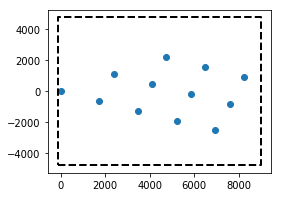

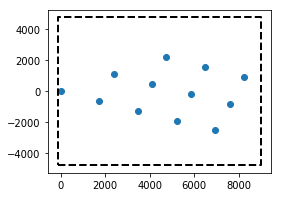

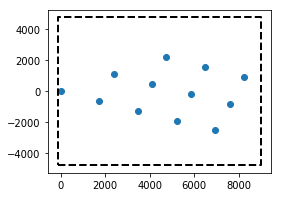

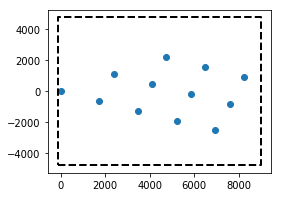

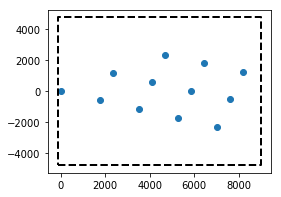

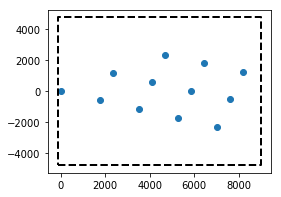

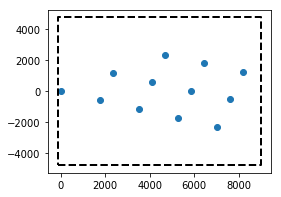

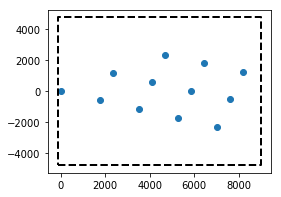

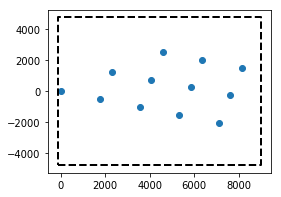

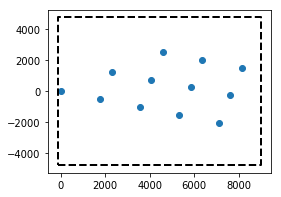

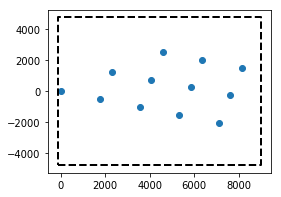

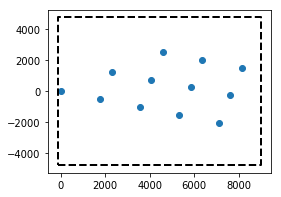

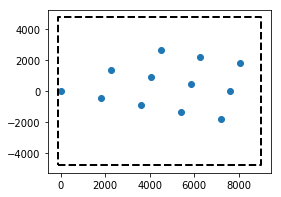

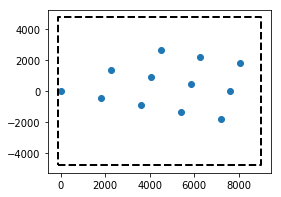

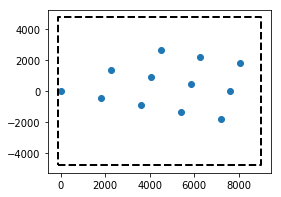

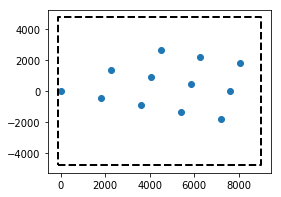

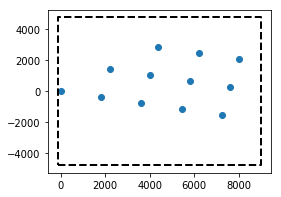

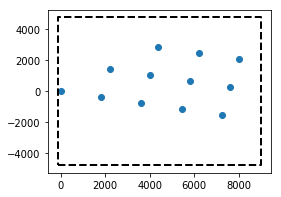

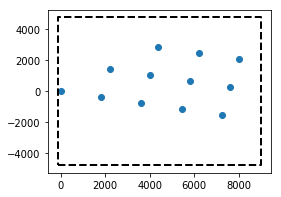

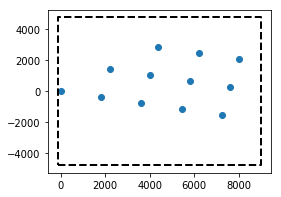

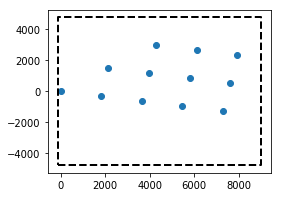

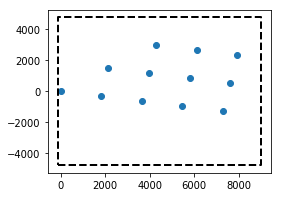

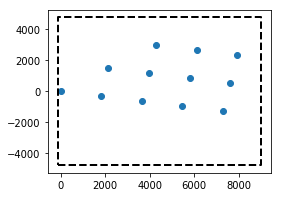

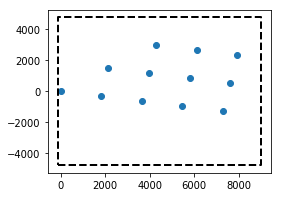

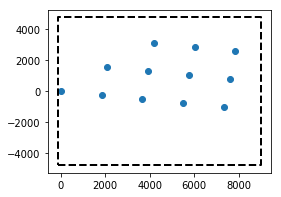

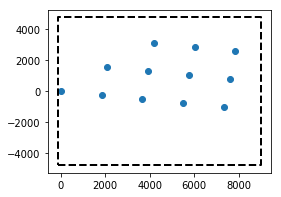

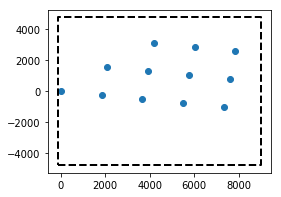

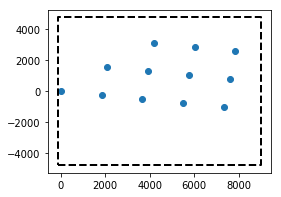

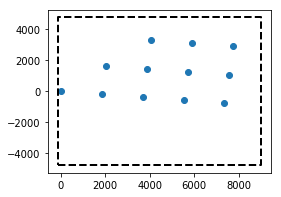

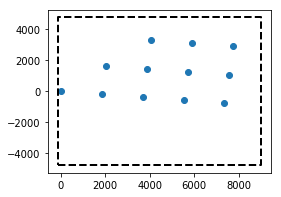

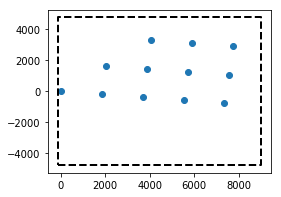

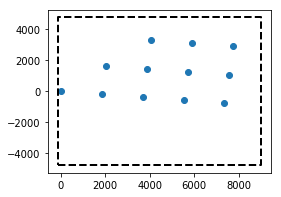

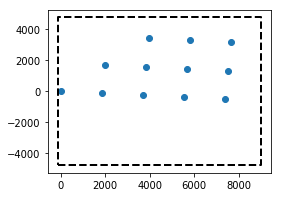

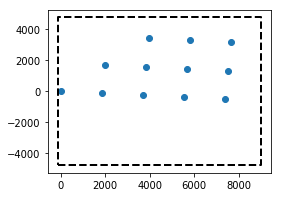

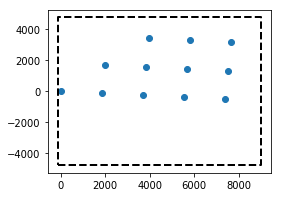

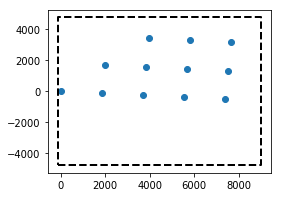

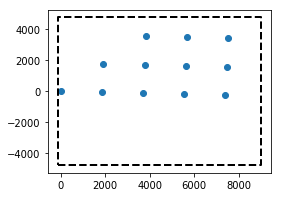

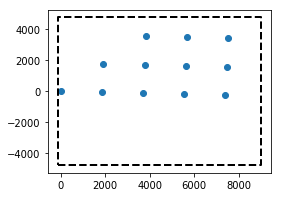

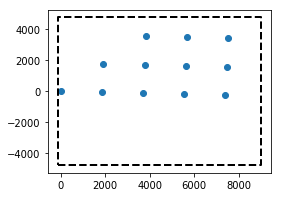

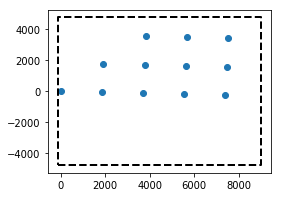

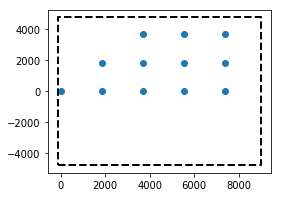

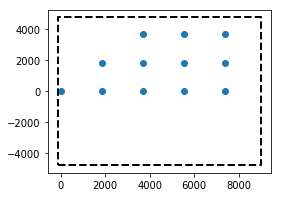

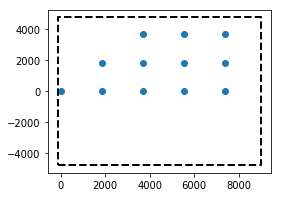

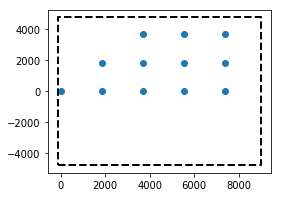

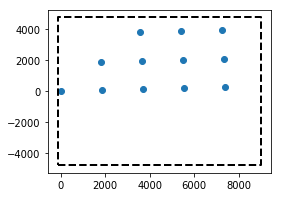

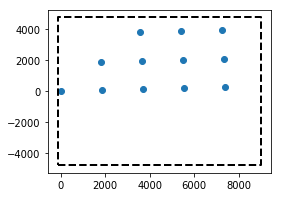

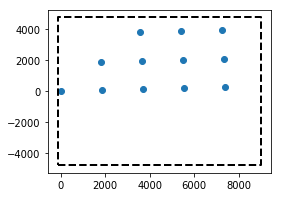

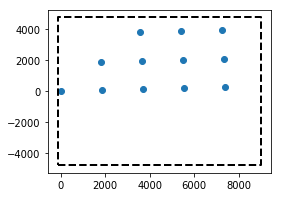

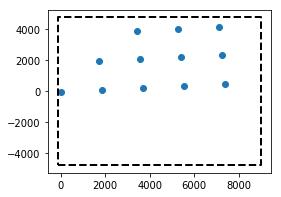

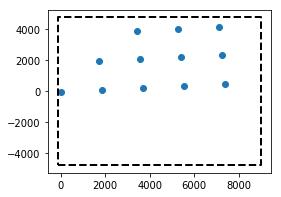

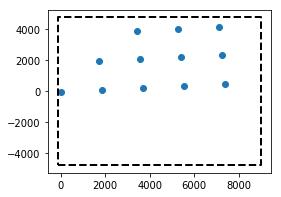

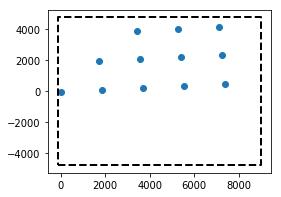

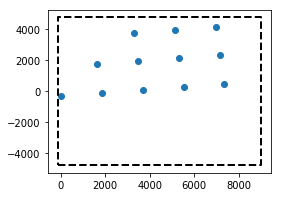

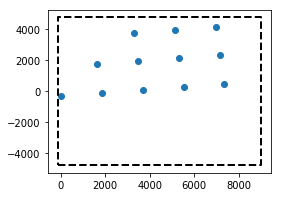

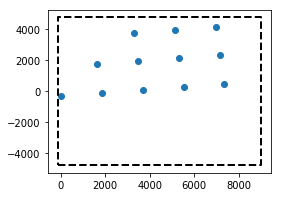

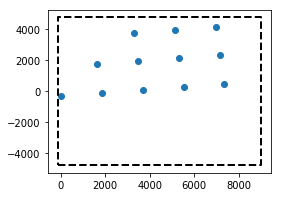

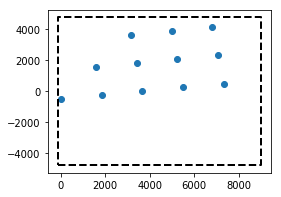

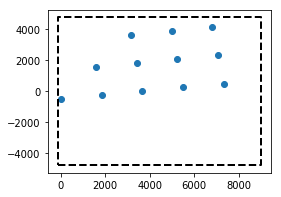

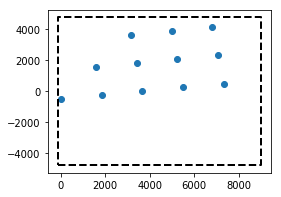

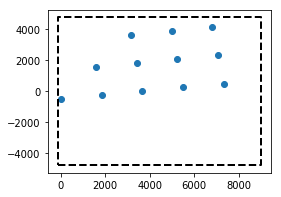

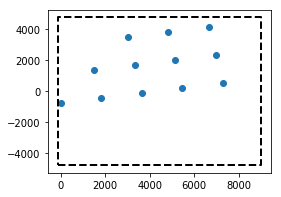

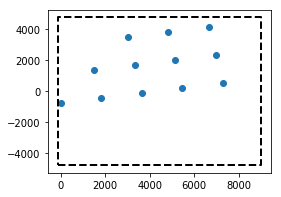

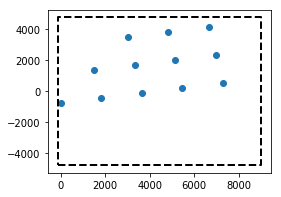

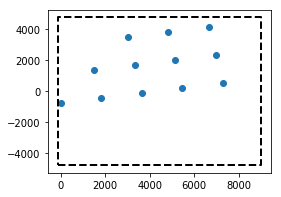

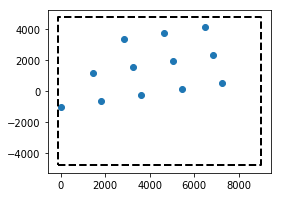

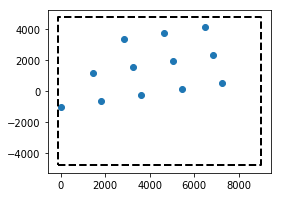

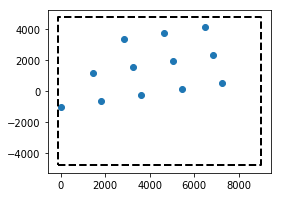

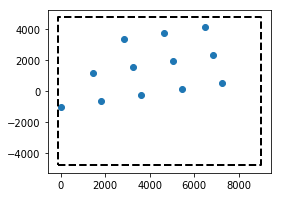

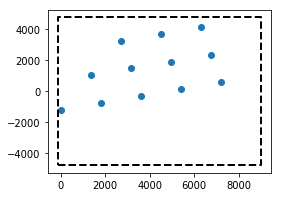

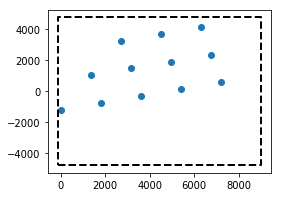

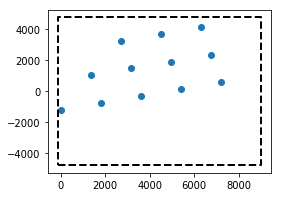

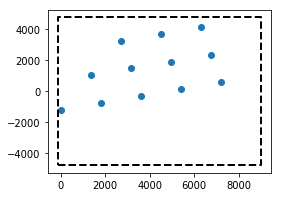

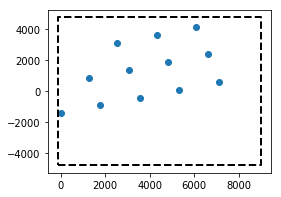

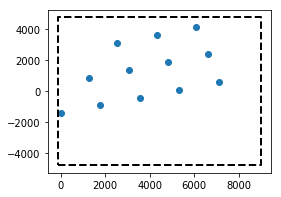

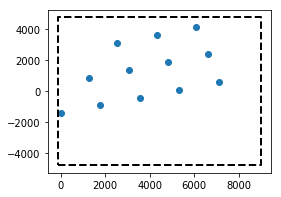

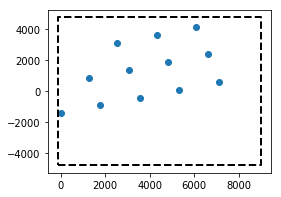

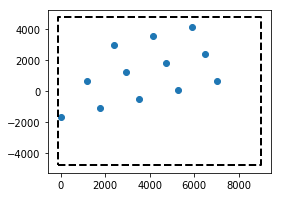

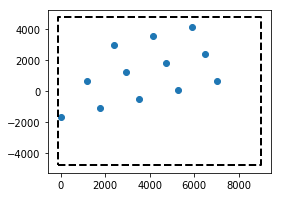

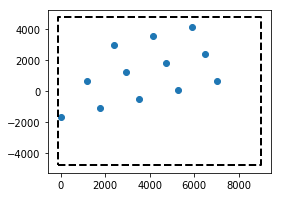

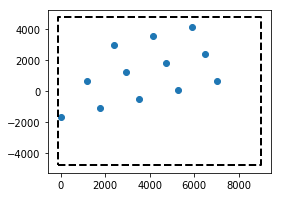

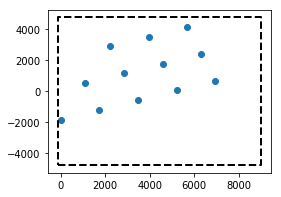

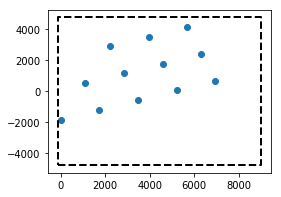

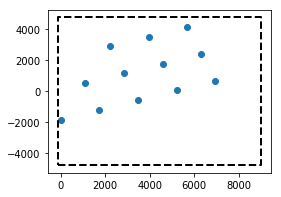

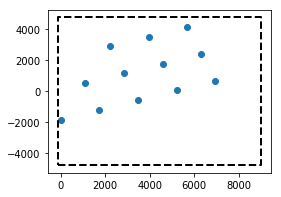

In [21]:
for index,case in enumerate(caseNames):
    fig = plt.figure(figsize=(4,3))
    plt.plot([-126,9000,9000,-126,-126],
            [-4800,-4800,4800,4800,-4800],'--k',lw=2,label='Low')
    plt.scatter(xlocs_new[index].values(),ylocs_new[index].values())

In [28]:
yloc = 0.0
zloc = HubHt
for inflow in ['Inflow44']:#Inflows:
    for seed in [0]:#range(1,nSeeds):
        abspath = '/scratch/kshaler/Shell/Task2_2/{0}/Seed_{1}/'.format(inflow,seed)
        TSpathLow  = abspath+'Low'
        print(TSpathLow)
        IFdata = stochasticTurbulence(D,prefix=TSpathLow)
        IFdata.readBTS('.',HubHt)
        meanu = IFdata.u[:,IFdata.jHub,IFdata.kHub].mean()
        Width = IFdata.dY*(IFdata.nY-1)
        lowTime = np.arange(0, 1750., IFdata.dT)
        print(meanu)
        
        for index,case in enumerate(caseNames):
            outpath = '/scratch/kshaler/Shell/Task2_2/{0}/Case_{1}/Seed_{2}/TurbSim/'.format(inflow,index,seed)
            for wt in range(nTurbs):
                tstart=int(xlocs_new[index][wt]/meanu/IFdata.dT+3.0*D)
                #print(tstart)
                tmp = lowTime.shape[0]-tstart

                TurbLoc_rel=ylocs_new[index][wt]+Width/2.

                fileOut = outpath+'USRTimeSeries_T{0}.txt'.format(wt)
                #print(fileOut)
                uvel = np.zeros(lowTime.shape[0])
                vvel = np.zeros(lowTime.shape[0])
                wvel = np.zeros(lowTime.shape[0])

                uvel[:tmp] = IFdata.u[tstart:,IFdata.y2j(TurbLoc_rel),IFdata.kHub]
                vvel[:tmp] = IFdata.v[tstart:,IFdata.y2j(TurbLoc_rel),IFdata.kHub]
                wvel[:tmp] = IFdata.w[tstart:,IFdata.y2j(TurbLoc_rel),IFdata.kHub]

                uvel[tmp:] = IFdata.u[:tstart,IFdata.y2j(TurbLoc_rel),IFdata.kHub]
                vvel[tmp:] = IFdata.v[:tstart,IFdata.y2j(TurbLoc_rel),IFdata.kHub]
                wvel[tmp:] = IFdata.w[:tstart,IFdata.y2j(TurbLoc_rel),IFdata.kHub]


                writeTimeSeriesFile(fileOut,yloc,zloc,uvel,vvel,wvel,lowTime)

                #fig = plt.figure(figsize=(6,4))
                #plt.plot(lowTime,IFdata.u[:,IFdata.y2j(TurbLoc_rel),IFdata.kHub])
                #plt.plot(lowTime,uvel)

/scratch/kshaler/Shell/Task2_2/Inflow44/Seed_0/Low
Opening file /scratch/kshaler/Shell/Task2_2/Inflow44/Seed_0/Low.bts...
16.803194438915945
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_0/Seed_0/TurbSim/USRTimeSeries_T0.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_0/Seed_0/TurbSim/USRTimeSeries_T1.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_0/Seed_0/TurbSim/USRTimeSeries_T2.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_0/Seed_0/TurbSim/USRTimeSeries_T3.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_0/Seed_0/TurbSim/USRTimeSeries_T4.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_0/Seed_0/TurbSim/USRTimeSeries_T5.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_0/Seed_0/TurbSim/USRTimeSeries_T6.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_0/Seed_0/TurbSim/USRTimeSeries_T7.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_0/Seed_0/TurbSim/USRTimeSeries_T8.txt
Writing /scratch/kshaler/Shell/Task2_2/I

Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_8/Seed_0/TurbSim/USRTimeSeries_T5.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_8/Seed_0/TurbSim/USRTimeSeries_T6.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_8/Seed_0/TurbSim/USRTimeSeries_T7.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_8/Seed_0/TurbSim/USRTimeSeries_T8.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_8/Seed_0/TurbSim/USRTimeSeries_T9.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_8/Seed_0/TurbSim/USRTimeSeries_T10.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_8/Seed_0/TurbSim/USRTimeSeries_T11.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_9/Seed_0/TurbSim/USRTimeSeries_T0.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_9/Seed_0/TurbSim/USRTimeSeries_T1.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_9/Seed_0/TurbSim/USRTimeSeries_T2.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_9/Seed_0/TurbSim/USRTimeSeries_T3.t

Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_16/Seed_0/TurbSim/USRTimeSeries_T7.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_16/Seed_0/TurbSim/USRTimeSeries_T8.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_16/Seed_0/TurbSim/USRTimeSeries_T9.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_16/Seed_0/TurbSim/USRTimeSeries_T10.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_16/Seed_0/TurbSim/USRTimeSeries_T11.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_17/Seed_0/TurbSim/USRTimeSeries_T0.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_17/Seed_0/TurbSim/USRTimeSeries_T1.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_17/Seed_0/TurbSim/USRTimeSeries_T2.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_17/Seed_0/TurbSim/USRTimeSeries_T3.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_17/Seed_0/TurbSim/USRTimeSeries_T4.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_17/Seed_0/TurbSim/USRTime

Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_24/Seed_0/TurbSim/USRTimeSeries_T5.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_24/Seed_0/TurbSim/USRTimeSeries_T6.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_24/Seed_0/TurbSim/USRTimeSeries_T7.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_24/Seed_0/TurbSim/USRTimeSeries_T8.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_24/Seed_0/TurbSim/USRTimeSeries_T9.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_24/Seed_0/TurbSim/USRTimeSeries_T10.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_24/Seed_0/TurbSim/USRTimeSeries_T11.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_25/Seed_0/TurbSim/USRTimeSeries_T0.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_25/Seed_0/TurbSim/USRTimeSeries_T1.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_25/Seed_0/TurbSim/USRTimeSeries_T2.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_25/Seed_0/TurbSim/USRTime

Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_33/Seed_0/TurbSim/USRTimeSeries_T3.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_33/Seed_0/TurbSim/USRTimeSeries_T4.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_33/Seed_0/TurbSim/USRTimeSeries_T5.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_33/Seed_0/TurbSim/USRTimeSeries_T6.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_33/Seed_0/TurbSim/USRTimeSeries_T7.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_33/Seed_0/TurbSim/USRTimeSeries_T8.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_33/Seed_0/TurbSim/USRTimeSeries_T9.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_33/Seed_0/TurbSim/USRTimeSeries_T10.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_33/Seed_0/TurbSim/USRTimeSeries_T11.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_34/Seed_0/TurbSim/USRTimeSeries_T0.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_34/Seed_0/TurbSim/USRTime

Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_42/Seed_0/TurbSim/USRTimeSeries_T1.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_42/Seed_0/TurbSim/USRTimeSeries_T2.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_42/Seed_0/TurbSim/USRTimeSeries_T3.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_42/Seed_0/TurbSim/USRTimeSeries_T4.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_42/Seed_0/TurbSim/USRTimeSeries_T5.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_42/Seed_0/TurbSim/USRTimeSeries_T6.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_42/Seed_0/TurbSim/USRTimeSeries_T7.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_42/Seed_0/TurbSim/USRTimeSeries_T8.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_42/Seed_0/TurbSim/USRTimeSeries_T9.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_42/Seed_0/TurbSim/USRTimeSeries_T10.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_42/Seed_0/TurbSim/USRTimeS

Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_50/Seed_0/TurbSim/USRTimeSeries_T3.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_50/Seed_0/TurbSim/USRTimeSeries_T4.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_50/Seed_0/TurbSim/USRTimeSeries_T5.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_50/Seed_0/TurbSim/USRTimeSeries_T6.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_50/Seed_0/TurbSim/USRTimeSeries_T7.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_50/Seed_0/TurbSim/USRTimeSeries_T8.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_50/Seed_0/TurbSim/USRTimeSeries_T9.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_50/Seed_0/TurbSim/USRTimeSeries_T10.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_50/Seed_0/TurbSim/USRTimeSeries_T11.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_51/Seed_0/TurbSim/USRTimeSeries_T0.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_51/Seed_0/TurbSim/USRTime

Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_58/Seed_0/TurbSim/USRTimeSeries_T1.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_58/Seed_0/TurbSim/USRTimeSeries_T2.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_58/Seed_0/TurbSim/USRTimeSeries_T3.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_58/Seed_0/TurbSim/USRTimeSeries_T4.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_58/Seed_0/TurbSim/USRTimeSeries_T5.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_58/Seed_0/TurbSim/USRTimeSeries_T6.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_58/Seed_0/TurbSim/USRTimeSeries_T7.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_58/Seed_0/TurbSim/USRTimeSeries_T8.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_58/Seed_0/TurbSim/USRTimeSeries_T9.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_58/Seed_0/TurbSim/USRTimeSeries_T10.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_58/Seed_0/TurbSim/USRTimeS

Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_65/Seed_0/TurbSim/USRTimeSeries_T7.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_65/Seed_0/TurbSim/USRTimeSeries_T8.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_65/Seed_0/TurbSim/USRTimeSeries_T9.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_65/Seed_0/TurbSim/USRTimeSeries_T10.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_65/Seed_0/TurbSim/USRTimeSeries_T11.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_66/Seed_0/TurbSim/USRTimeSeries_T0.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_66/Seed_0/TurbSim/USRTimeSeries_T1.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_66/Seed_0/TurbSim/USRTimeSeries_T2.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_66/Seed_0/TurbSim/USRTimeSeries_T3.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_66/Seed_0/TurbSim/USRTimeSeries_T4.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_66/Seed_0/TurbSim/USRTime

Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_73/Seed_0/TurbSim/USRTimeSeries_T3.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_73/Seed_0/TurbSim/USRTimeSeries_T4.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_73/Seed_0/TurbSim/USRTimeSeries_T5.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_73/Seed_0/TurbSim/USRTimeSeries_T6.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_73/Seed_0/TurbSim/USRTimeSeries_T7.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_73/Seed_0/TurbSim/USRTimeSeries_T8.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_73/Seed_0/TurbSim/USRTimeSeries_T9.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_73/Seed_0/TurbSim/USRTimeSeries_T10.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_73/Seed_0/TurbSim/USRTimeSeries_T11.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_74/Seed_0/TurbSim/USRTimeSeries_T0.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_74/Seed_0/TurbSim/USRTime

Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_81/Seed_0/TurbSim/USRTimeSeries_T5.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_81/Seed_0/TurbSim/USRTimeSeries_T6.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_81/Seed_0/TurbSim/USRTimeSeries_T7.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_81/Seed_0/TurbSim/USRTimeSeries_T8.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_81/Seed_0/TurbSim/USRTimeSeries_T9.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_81/Seed_0/TurbSim/USRTimeSeries_T10.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_81/Seed_0/TurbSim/USRTimeSeries_T11.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_82/Seed_0/TurbSim/USRTimeSeries_T0.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_82/Seed_0/TurbSim/USRTimeSeries_T1.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_82/Seed_0/TurbSim/USRTimeSeries_T2.txt
Writing /scratch/kshaler/Shell/Task2_2/Inflow44/Case_82/Seed_0/TurbSim/USRTime

In [21]:
def writeTimeSeriesFile(fileOut,yloc,zloc,u,v,w,time):
    import math
    """ Write a TurbSim primary input file, 

    """

    print('Writing {0}'.format(fileOut))
    # --- Writing TurbSim user-defined time series file
    with open(fileOut, 'w') as f:
        f.write('--------------TurbSim v2.00.* User Time Series Input File-----------------------\n')
        f.write('     Time series input from Experimental Data\n')
        f.write('--------------------------------------------------------------------------------\n')
        f.write('          3 nComp - Number of velocity components in the file\n')
        f.write('          1 nPoints - Number of time series points contained in this file (-)\n')
        f.write('          1 RefPtID - Index of the reference point (1-nPoints)\n')
        f.write('     Pointyi Pointzi ! nPoints listed in order of increasing height\n')
        f.write('       (m)     (m)\n')
        f.write('       {0}   {1}\n'.format(yloc,zloc))
        f.write('--------Time Series-------------------------------------------------------------\n')
        f.write('Elapsed Time            Point01u                Point01v                Point01w\n')
        f.write('       (s)             (m/s)                   (m/s)                   (m/s)\n')
        for i in range(time.shape[0]):
            #time[i]=np.around(int(math.floor(time[i]/0.05))*.05,decimals=2)
            f.write('{:.2f}\t{:.5f}\t{:.5f}\t{:.5f}\n'.format(time[i],u[i],v[i],w[i]))

### Create FFarm input files. FFarm ready to run after this.

/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow00
write ElastoDyn and ServoDyn files
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow00/Case_0/Seed_0
Opening file ../../Seed_0/Low.bts...
Vhub_Low:  7.258017423848339
Opening file TurbSim/HighT1.bts...
Vhub_High:  6.605126786934195
./FFarmParams.txt
Opening file TurbSim/Low.bts...
Opening file TurbSim/HighT1.bts...
-3055.567481 6536.189480999999
Writing a new ./FFarm_mod.fstf file from scratch
write ElastoDyn and ServoDyn files
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow00/Case_1/Seed_0
Opening file ../../Seed_0/Low.bts...
Vhub_Low:  7.258017423848339
Opening file TurbSim/HighT1.bts...
Vhub_High:  6.605126786934195
./FFarmParams.txt
Opening file TurbSim/Low.bts...
Opening file TurbSim/HighT1.bts...
-3055.567481 6536.189480999999
Writing a new ./FFarm_mod.fstf file from scratch
write ElastoDyn and ServoDyn files
/lustre/eaglefs/scratch/kshaler/Shell/Task2_2/Inflow00/Case_2/Seed_0
Opening file ../../Seed_0/Low.bts...
Vhub

KeyboardInterrupt: 

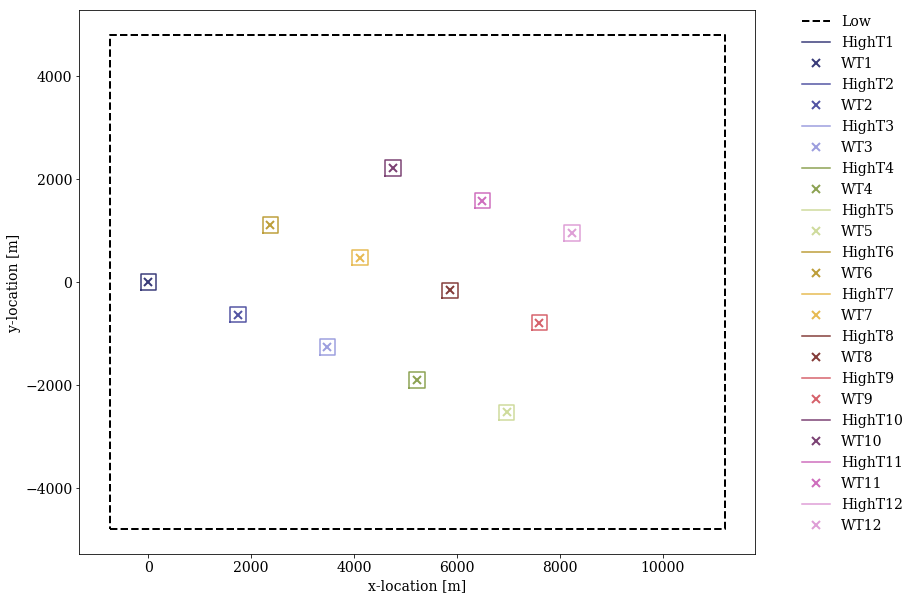

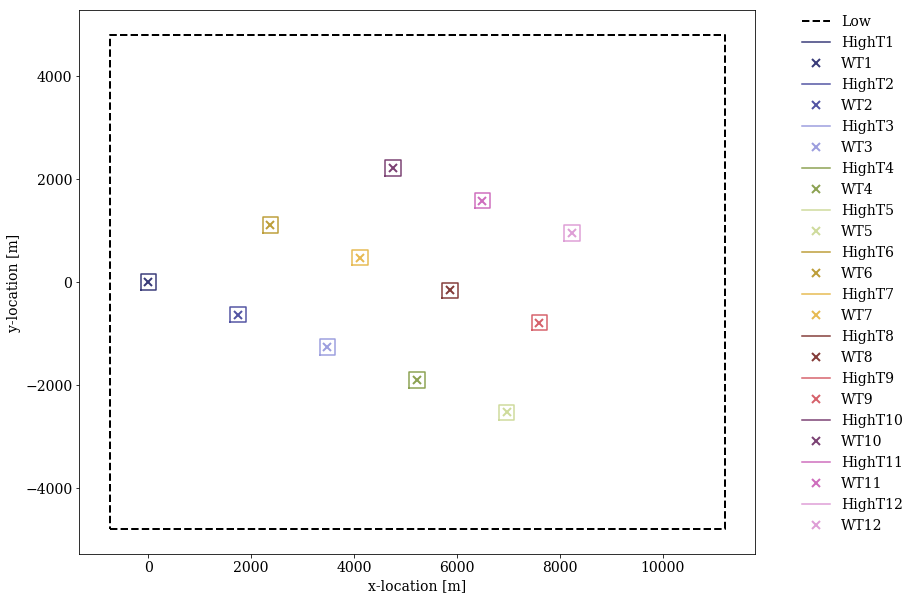

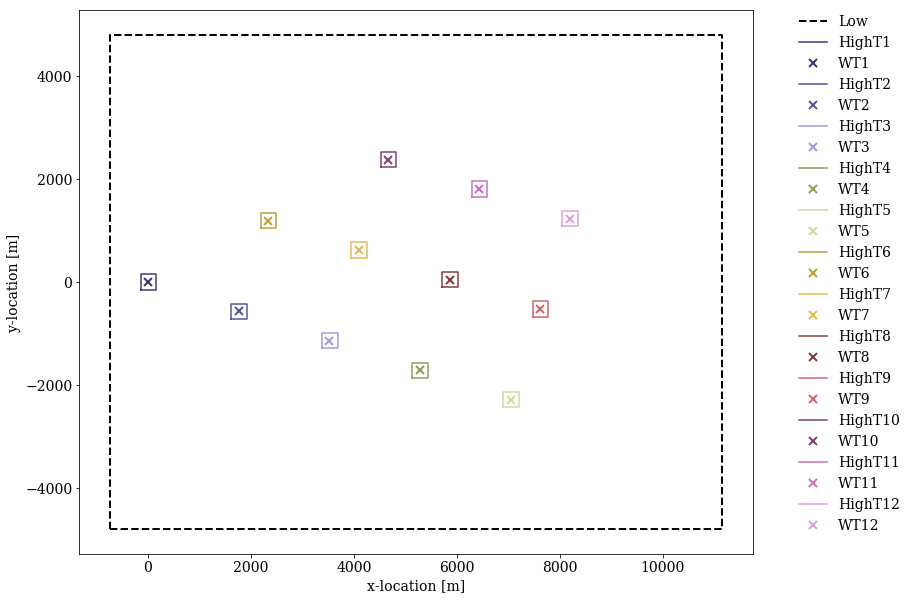

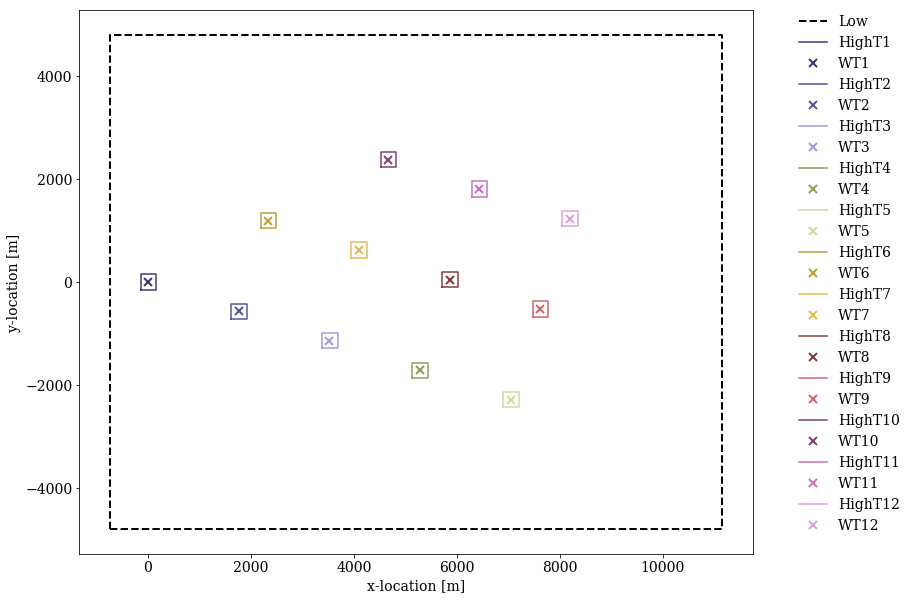

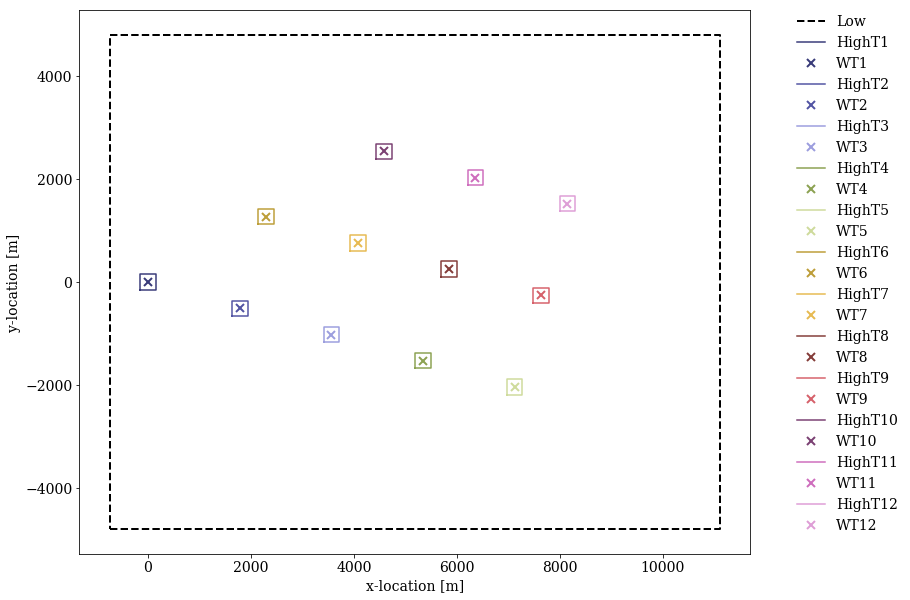

In [40]:
#datPath = '/scratch/kshaler/Shell/turbineModel'
#datRoot = 'Test_'

#copyFFNominalFiles(caseNames,nSeeds,nTurbs,datPath,datRoot)

#nCases=42
os.chdir('/scratch/kshaler/Shell/Task2_2/')

binvals = pd.read_csv('../BinVals.csv', header=None,index_col=0,delimiter=',')

caseNames=['None']*nCases
for case in range(nCases):
    caseNames[int(case)] = 'Case_{0}'.format(case)

#caseNames=['Case_0']
nSeeds=1
    
for inflow in ParamVals.columns:
    if ParamVals[inflow]['Vhub'] == '6.6':
        BinVal = binvals[1]
        HubHt_LowTS = 395.0
    elif ParamVals[inflow]['Vhub'] == '8.6':
        BinVal = binvals[2]
        HubHt_LowTS = 405.0
    elif ParamVals[inflow]['Vhub'] == '10.6':
        BinVal = binvals[3]
        HubHt_LowTS = 407.5
    elif ParamVals[inflow]['Vhub'] == '12.6':
        BinVal = binvals[4]
        HubHt_LowTS = 405.0
    else:
        BinVal = binvals[5]
        HubHt_LowTS = 405.0

    os.chdir(inflow)
    print(os.getcwd())
    #caseNames[:42]
    createFFParamFiles(caseNames[:42],nSeeds,float(ParamVals[inflow]['Vhub']),HubHt_LowTS,Yaw,BinVal,'FFarmParams.txt')
    os.chdir('../')

In [ ]:
#datPath = '/scratch/kshaler/Shell/turbineModel'
#datRoot = 'Test_'

#copyFFNominalFiles(caseNames,nSeeds,nTurbs,datPath,datRoot)

#nCases=42
os.chdir('/scratch/kshaler/Shell/Task2_2/')

binvals = pd.read_csv('../BinVals.csv', header=None,index_col=0,delimiter=',')

caseNames=['None']*nCases
for case in range(nCases):
    caseNames[int(case)] = 'Case_{0}'.format(case)

#caseNames=['Case_0']
nSeeds=1
    
for inflow in ParamVals.columns:
    if ParamVals[inflow]['Vhub'] == '6.6':
        BinVal = binvals[1]
    elif ParamVals[inflow]['Vhub'] == '8.6':
        BinVal = binvals[2]
    elif ParamVals[inflow]['Vhub'] == '10.6':
        BinVal = binvals[3]
    elif ParamVals[inflow]['Vhub'] == '12.6':
        BinVal = binvals[4]
    else:
        BinVal = binvals[5]

    os.chdir(inflow)
    print(os.getcwd())
    createFFParamFiles(caseNames[42:],nSeeds,ParamVals,Yaw,BinVal,'FFarmParams.txt')
    os.chdir('../')